# Naive Bayes for text classification

### Read data: a known repository of sms spam data

In [36]:
import warnings
warnings.filterwarnings("ignore")

In [37]:
# ! pip install requests
import requests 
import zipfile
import pandas as pd
import os

#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'
#data_file = 'SMSSpamCollection'

# Make request
#resp = requests.get(url)

# Get filename
#filename = url.split('/')[-1]

# Download zipfile
#with open(filename, 'wb') as f:
#  f.write(resp.content)

# Extract Zip
#with zipfile.ZipFile(filename, 'r') as zip:
#  zip.extractall('')


# Define the data folder and file path
data_file = os.path.join('data/allWords.tsv')


# Read Dataset
data = pd.read_table(data_file, 
                     header = 0,
                     names = ['type', 'message']
                     )

# Show dataset
data

,type,message
0,other,.@katie_phd alternate 'reproachful mandrill' ...
1,other,".@theophani can i get ""drill"" in there it wou..."
2,other,“@chrisjboyland baby mandrill paignton zoo 29t...
3,other,“@missmya #nameanamazingband mandrill ” mint c...
4,other,“fat city strut” by mandrill is my new jam htt...
...,...,...
8973,app,we've simplified and reduced pricing for every...
8974,app,we’re unifying your mandrill and mailchimp dat...
8975,app,whaaat i didn't know @mailchimp had an email ...
8976,app,would like to send emails for welcome passwor...


#### Install the language toolkit and everything necessary

In [38]:
# NLTK: Natural Language Toolkit
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package punkt to /Users/nerea/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/nerea/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**1st step: Tokenization**. <BR> It consists of separating the messages into words in order to be able to treat each. <BR>
We are doing it removing punctuation at the same time (thanks to the RegexpTokenizer function)

In [39]:
# Tokenize: create words from sentences, and removes punctuation
tokenizer = RegexpTokenizer(r'\w+')
data['tokens'] = data.apply(lambda x: tokenizer.tokenize(x['message']), axis = 1)
data

,type,message,tokens
0,other,.@katie_phd alternate 'reproachful mandrill' ...,"[katie_phd, alternate, reproachful, mandrill, ..."
1,other,".@theophani can i get ""drill"" in there it wou...","[theophani, can, i, get, drill, in, there, it,..."
2,other,“@chrisjboyland baby mandrill paignton zoo 29t...,"[chrisjboyland, baby, mandrill, paignton, zoo,..."
3,other,“@missmya #nameanamazingband mandrill ” mint c...,"[missmya, nameanamazingband, mandrill, mint, c..."
4,other,“fat city strut” by mandrill is my new jam htt...,"[fat, city, strut, by, mandrill, is, my, new, ..."
...,...,...,...
8973,app,we've simplified and reduced pricing for every...,"[we, ve, simplified, and, reduced, pricing, fo..."
8974,app,we’re unifying your mandrill and mailchimp dat...,"[we, re, unifying, your, mandrill, and, mailch..."
8975,app,whaaat i didn't know @mailchimp had an email ...,"[whaaat, i, didn, t, know, mailchimp, had, an,..."
8976,app,would like to send emails for welcome passwor...,"[would, like, to, send, emails, for, welcome, ..."


**2nd step: Elimination of stop words**: <BR>Elimination of words that normally do not add value (prepositions, conjunctions, etc.), only noise (there are exceptions, though) <BR> This is done to reduce size of our dataset (already large). 
<BR> There are many sources of stopwords in Python, for English language, Spacy has 326 words, Gensim 337, Scikit-learn 318, NLTK library, 179. 
<BR> More or less is not better in itself, you need to read them and assess whether you want to include or remove some

In [40]:
# These are the stop words provided by Sklearn
from sklearn.feature_extraction import text
print(text.ENGLISH_STOP_WORDS)

frozenset({'themselves', 'still', 'four', 'we', 'she', 'well', 'back', 'may', 'be', 'our', 'always', 'whence', 'whether', 'to', 'part', 'nor', 'of', 'hasnt', 'name', 'therein', 'via', 'into', 'yourself', 'but', 'amount', 'seems', 'interest', 'than', 'they', 'up', 'see', 'same', 'with', 'because', 'can', 'now', 'both', 'could', 'first', 'among', 'yet', 'hence', 'never', 'detail', 'more', 'whither', 'otherwise', 'thereby', 'former', 'them', 'about', 'something', 'thru', 'amoungst', 'often', 'other', 'herself', 'whereafter', 'too', 'six', 'nobody', 'most', 'third', 'describe', 'from', 'ourselves', 'should', 'hundred', 're', 'mill', 'whenever', 'sometime', 'none', 'however', 'noone', 'cry', 'us', 'my', 'fifty', 'thence', 'anything', 'though', 'whatever', 'keep', 'on', 'also', 'were', 'forty', 'here', 'the', 'it', 'have', 'next', 'eleven', 'without', 'thereafter', 'himself', 'these', 'while', 'afterwards', 'throughout', 'whereas', 'twelve', 'another', 'only', 'whereby', 'whoever', 'been', '

In [41]:
# These are the stop words provided by nltk, the library we will be using in this example
from nltk.corpus import stopwords
stop=stopwords.words('english')
print(stopwords.words('english'))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [42]:
# Remove stop words
data['tokens'] = data['tokens'].apply(lambda x: [item for item in x if item not in stop])
data

,type,message,tokens
0,other,.@katie_phd alternate 'reproachful mandrill' ...,"[katie_phd, alternate, reproachful, mandrill, ..."
1,other,".@theophani can i get ""drill"" in there it wou...","[theophani, get, drill, would, picture, mandri..."
2,other,“@chrisjboyland baby mandrill paignton zoo 29t...,"[chrisjboyland, baby, mandrill, paignton, zoo,..."
3,other,“@missmya #nameanamazingband mandrill ” mint c...,"[missmya, nameanamazingband, mandrill, mint, c..."
4,other,“fat city strut” by mandrill is my new jam htt...,"[fat, city, strut, mandrill, new, jam, http, t..."
...,...,...,...
8973,app,we've simplified and reduced pricing for every...,"[simplified, reduced, pricing, everyone, hoora..."
8974,app,we’re unifying your mandrill and mailchimp dat...,"[unifying, mandrill, mailchimp, data, mailchim..."
8975,app,whaaat i didn't know @mailchimp had an email ...,"[whaaat, know, mailchimp, email, delivery, api..."
8976,app,would like to send emails for welcome passwor...,"[would, like, send, emails, welcome, password,..."


**3rd step: Apply stemming.** The two words that mean the same thing, but are not spelled the same

**Stemming**: Stemming is a process of reducing inflected words to their word stem, base or root form. This is done by removing affixes, which are word parts that are added to the root to change its meaning or grammatical function. For example, the word "running" can be stemmed to "run" by removing the suffix "-ing".

**Lemmatization**: It is more used in NLP projects in English, since in this language good (good), better (better) and the best (best) are completely different words. In these cases stemming would not work. Thus, the lemmatization would convert all those words to their base (good), in such a way that they come to mean the same thing. 

The nltk does not perform the conversion automatically unless it is given additional information about the type of word (adjective, noun, verb, etc). If you do not specify the grammatical category, the lemmatiser assumes that the words are nouns, and for nouns there is no direct association, for instance, between "better" and "good". This makes more complex the whole process, so we would not implement lemmatization in this example

In [43]:
# Apply Porter stemming
stemmer = PorterStemmer()
data['tokens'] = data['tokens'].apply(lambda x: [stemmer.stem(item) for item in x])
data

,type,message,tokens
0,other,.@katie_phd alternate 'reproachful mandrill' ...,"[katie_phd, altern, reproach, mandril, cover, ..."
1,other,".@theophani can i get ""drill"" in there it wou...","[theophani, get, drill, would, pictur, mandril..."
2,other,“@chrisjboyland baby mandrill paignton zoo 29t...,"[chrisjboyland, babi, mandril, paignton, zoo, ..."
3,other,“@missmya #nameanamazingband mandrill ” mint c...,"[missmya, nameanamazingband, mandril, mint, co..."
4,other,“fat city strut” by mandrill is my new jam htt...,"[fat, citi, strut, mandril, new, jam, http, th..."
...,...,...,...
8973,app,we've simplified and reduced pricing for every...,"[simplifi, reduc, price, everyon, hooray, http..."
8974,app,we’re unifying your mandrill and mailchimp dat...,"[unifi, mandril, mailchimp, data, mailchimp, e..."
8975,app,whaaat i didn't know @mailchimp had an email ...,"[whaaat, know, mailchimp, email, deliveri, api..."
8976,app,would like to send emails for welcome passwor...,"[would, like, send, email, welcom, password, r..."


In [44]:
# Install openpyxl
# %pip install openpyxl

# we can export it to excel
data.to_excel("data.xlsx")

## Naive Bayes

Naive Bayes model admits two types of source data:<BR>

**1. A Matrix** that shows, for each document, either how many times each of the words in all the documents has appeared or how important is the word in each document compared to the whole source of data. We will run an example first with a Matrix showing frequencies and the 2nd with the more complex one. <BR>
**2. An array of appearances**. It is similar to a TF matrix, but in this case, instead of indicating the number of occurrences, it simply indicates whether or not that word appeared.<BR>
<BR>If we have plenty of data, normally a Matrix is preferred

First, we are detokenizing the rows, that is, joining back the words, once they have been cleaned

In [45]:
# Unify the strings once again
data['tokens'] = data['tokens'].apply(lambda x: ' '.join(x))
data

,type,message,tokens
0,other,.@katie_phd alternate 'reproachful mandrill' ...,katie_phd altern reproach mandril cover davidq...
1,other,".@theophani can i get ""drill"" in there it wou...",theophani get drill would pictur mandril hold ...
2,other,“@chrisjboyland baby mandrill paignton zoo 29t...,chrisjboyland babi mandril paignton zoo 29th a...
3,other,“@missmya #nameanamazingband mandrill ” mint c...,missmya nameanamazingband mandril mint condit ...
4,other,“fat city strut” by mandrill is my new jam htt...,fat citi strut mandril new jam http thisismyja...
...,...,...,...
8973,app,we've simplified and reduced pricing for every...,simplifi reduc price everyon hooray http blog ...
8974,app,we’re unifying your mandrill and mailchimp dat...,unifi mandril mailchimp data mailchimp email m...
8975,app,whaaat i didn't know @mailchimp had an email ...,whaaat know mailchimp email deliveri api servi...
8976,app,would like to send emails for welcome passwor...,would like send email welcom password reset pa...


Now we are splitting our data as always

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Make split
x_train, x_test, y_train, y_test = train_test_split(
    data['tokens'], 
    data['type'], 
    test_size= 0.2
    )

In [47]:
print("Training data set size: ", len(x_train))
print("Testing data set size: ", len(x_test))

Training data set size:  7182
Testing data set size:  1796


And here is where we create the matrix

In [48]:
# Create vectorizer
vectorizer = CountVectorizer(
    strip_accents = 'ascii', 
    lowercase = True
    )

# Fit vectorizer & transform it
vectorizer_fit = vectorizer.fit(x_train)
x_train_transformed = vectorizer_fit.transform(x_train)
x_test_transformed = vectorizer_fit.transform(x_test)

In [49]:
x_test_transformed

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 20258 stored elements and shape (1796, 1496)>

Now we build the Naive Bayes model and train it

In [50]:
# Build the model
from sklearn.naive_bayes import MultinomialNB

# Train the model
naive_bayes = MultinomialNB()
naive_bayes_fit = naive_bayes.fit(x_train_transformed, y_train)

And we make predictions

In [51]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score

# Make predictions
train_predict = naive_bayes_fit.predict(x_train_transformed)
test_predict = naive_bayes_fit.predict(x_test_transformed)

def get_scores(y_real, predict):
  ba_train = balanced_accuracy_score(y_real, predict)
  return ba_train

def print_scores(scores):
  return f"Balanced Accuracy: {scores}"

train_scores = get_scores(y_train, train_predict)
test_scores = get_scores(y_test, test_predict)

This is the result

In [52]:
print("## Train Accuracy")
print(print_scores(f"{train_scores:.3f}"))
print("\n## Test Accuracy")
print(print_scores(f"{test_scores:.3f}"))

## Train Accuracy
Balanced Accuracy: 0.997

## Test Accuracy
Balanced Accuracy: 0.997


And the confusion matrix

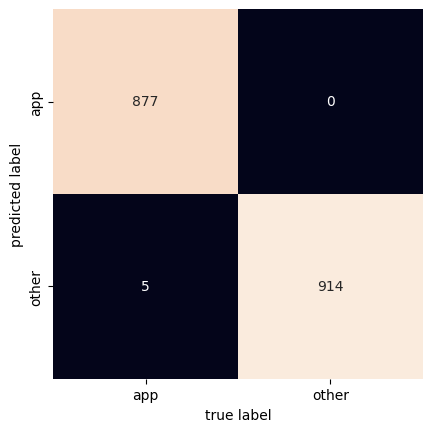

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test, test_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=naive_bayes_fit.classes_, yticklabels=naive_bayes_fit.classes_)
plt.xlabel('true label')
plt.ylabel('predicted label');